# Context | Convulutional Neural Network

The problem consists on identifing the sign language gestures for the digits from 1 to 10.

[Arda Mavi](https://github.com/ardamavi/Sign-Language-Digits-Dataset) has compiled a dataset consisting of 2062 images with the correspoding labels.

## Load datasets

The dataset had to be "fixed" since the labels did no match the images correctly.

More can be found in this, sometimes, [comic discussion](https://www.kaggle.com/datasets/ardamavi/sign-language-digits-dataset/discussion/57074); where the author at some point writes:

> "I said that again, again and again. Please read my comments before."



The label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] corresponds to the digit 2.


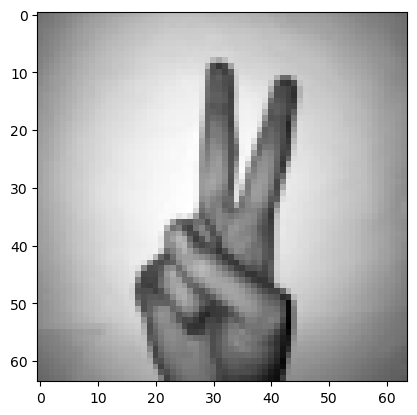

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

images = np.load("dataset/X.npy")  # images
labels = np.load("dataset/Y.npy")  # labels

# Split the dataset into training and testing sets 
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = 42)

# Example of an image that match the label
plt.imshow(images[500], cmap="gray")
print(f"The label: {labels[500]} corresponds to the digit 2.")


## Inspect the data
There are 2062 images 64 x 64 pixels. And there are an array of labels with 10 classes - digits from 1 to 10. 

We are spliting the dataset into two sets: 
* train_images: 1649 images
* test_images: 413 images

And finally, tha values of the pixels are already between [0, 1].

In [7]:
# Print the shapes to verify
print("Train images shape:", train_images.shape) # (1649, 64, 64)
print("Train labels shape:", train_labels.shape) # (1649, 10)
print("Test images shape:", test_images.shape) # (413, 64, 64)
print("Test labels shape:", test_labels.shape) # (413, 10)

# Reshape to make the images into 1D vector for each example
train_images = train_images.reshape((1649, 64, 64, 1))
test_images = test_images.reshape((413, 64, 64, 1))

# Finally, the values are already standarized and in a categorical form

Train images shape: (1649, 64, 64)
Train labels shape: (1649, 10)
Test images shape: (413, 64, 64)
Test labels shape: (413, 10)


### Model structure CNN

In [11]:
from tensorflow.keras import models, layers

network = models.Sequential()

# 1. Convolutional Layer with 32 filters and 3x3 kernel, ReLU activation
network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))

# 2. Pooling Layer (2x2)
network.add(layers.MaxPooling2D((2, 2)))

# 3. Convolutional Layer with 64 filters and 3x3 kernel, ReLU activation
network.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 4. Pooling Layer (2x2)
network.add(layers.MaxPooling2D((2, 2)))

# 5. Convolutional Layer with 128 filters and 3x3 kernel, ReLU activation
network.add(layers.Conv2D(128, (3, 3), activation='relu'))

# 6. Pooling Layer (2x2)
network.add(layers.MaxPooling2D((2, 2)))

# 7. Flatten the 2D output to 1D to feed into Dense layers
network.add(layers.Flatten())

# 8. Fully Connected Layer (Dense)
network.add(layers.Dense(128, activation='relu'))

# 9. Dropout to avoid overfitting
network.add(layers.Dropout(0.5))

# 10. Output Layer with 10 neurons (for 10 classes), Softmax activation
network.add(layers.Dense(10, activation='softmax'))

# Summary of the model
network.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,914 (2.61 MB)

 Trainable params: 683,914 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [13]:
# Compile the model
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs = 20, batch_size = 128, validation_data = (test_images, test_labels) )

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0903 - loss: 2.3184 - val_accuracy: 0.0920 - val_loss: 2.3052
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.1147 - loss: 2.3005 - val_accuracy: 0.3220 - val_loss: 2.2856
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.1882 - loss: 2.2511 - val_accuracy: 0.4625 - val_loss: 1.9561
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3309 - loss: 1.9326 - val_accuracy: 0.6416 - val_loss: 1.3429
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5390 - loss: 1.3485 - val_accuracy: 0.7724 - val_loss: 0.8027
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6398 - loss: 1.0598 - val_accuracy: 0.7845 - val_loss: 0.6911
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7035 - loss: 0.8780 - val_accuracy: 0.7821 - val_loss: 0.7275
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7328 - loss: 0.7897 - val_accuracy: 0.8039 - v

## Traning vs. Test Accuracy

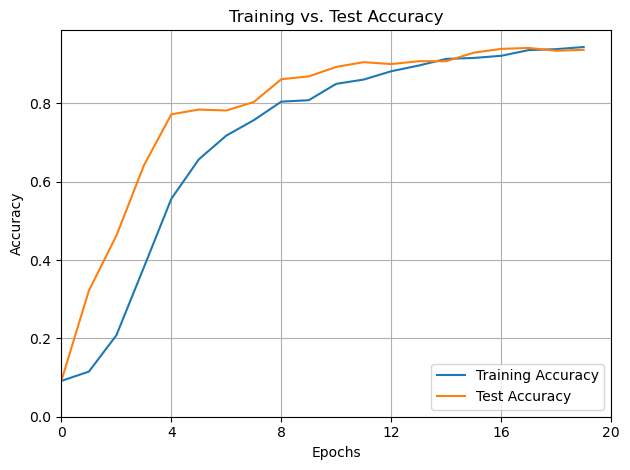

In [35]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Place the legend in the bottom-right corner
plt.legend(loc='lower right')

# Set the x-axis ticks to be multiples of 4
plt.xticks(range(0, len(history.history['accuracy']) + 1, 4))

# Set the limits to ensure the zero is at the bottom-left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

# Add a grid
plt.grid(True)

# Add a title
plt.title('Training vs. Test Accuracy')

# Remove space between plot and axis
plt.tight_layout()

# Show the plot
plt.show()


## Evaluate the accuracy of the model

In [27]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

#Compare the test and train loss and accuracy 
print(f"Loss: {round(test_loss, 2)} | Accuracy: {round(test_acc * 100, 1)}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9330 - loss: 0.1964
Loss: 0.17 | Accuracy: 94.7%


## Save the model

In [2]:
# Save the model trained
network.save("model.keras")

NameError: name 'network' is not defined